## Data loading and exploration

In [1]:
# Importamos la libreria os
import os
# Importamos la libreria open cv
import cv2
# Importamos la libreria numpy
import numpy as np
# Importamos Image de la libreria PIL
from PIL import Image
# Importamos la libreria matplotlib
import matplotlib.pyplot as plt
# Importamos train_test_split de la libreria sklearn
from sklearn.model_selection import train_test_split
# Preparamos el ambiente
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
# Importamos keras de la libreria tensorflow
from tensorflow import keras
# Importamos Sequential de la libreria keras
from keras.models import Sequential
# Importamos Conv2D,MaxPooling2D,Dense,Flatten,Dropout de la libreria keras
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
# Importamos BatchNormalization de la libreria tensorflow
from tensorflow.keras.layers import BatchNormalization
# Importamos la libreria tensorflow
import tensorflow as tf
# Importamos la libreria visualkeras
import visualkeras

In [2]:
# Definimos la ruta de las imagenes
fpath = 'C:\IAU3\Fotos_RemovedBG'
# Inicializamos random_seed
random_seed = 9
# Obtenemos las categorias
categories = os.listdir(fpath)
# Mostramos las categorias
print("List of categories = ",categories,"\n\nNo. of categories = ", len(categories))

List of categories =  ['BarraganSteven', 'BorjaLeonardo', 'CevallosJoan', 'LopezMelany', 'RivasSelena'] 

No. of categories =  5


In [3]:
 """
    Este método permite recorrer los elementos obtenidos de la ruta especificada a través de su categoria.

    Parametros
    -----------
        categories (str): Indica la ruta de cada categoria existente en la carpeta de origen.
        

    Returns:
        img_lst: Retorna la lista de imagenes
        labels: Retorna la lista etiquetas.
"""
def load_images_and_labels(categories):
    # Instanciamos la lista de imagenes
    img_lst=[]
    # Instanciamos la lista de etiquetas
    labels=[]
    # Bucle que recorre las categorias
    for index, category in enumerate(categories):
        # Bucle que recorre la ruta de las imagenes
        for image_name in os.listdir(fpath+"/"+category):
            # Leer las imagenes
            img = cv2.imread(fpath+"/"+category+"/"+image_name)
            # Transformamos el espacio de color de las imagenes
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            # Genera una arreglo con las imagenes y su formato
            img_array = Image.fromarray(img, 'RGB')
            # Añadimos la imagen a la lista
            img_lst.append(np.array(img_array))
            # Agregamos el indice a las etiquetas
            labels.append(index)
    #Retornamos la lista de imagenes y etiquetas
    return img_lst, labels

# Cargamos las imagenes y las etiquetas
images, labels = load_images_and_labels(categories)
# Mostramos la cantidad de imagenes y etiquetas cargadas
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
# Mostramos el tipo de arreglo creado
print(type(images),type(labels))

No. of images loaded =  165 
No. of labels loaded =  165
<class 'list'> <class 'list'>


In [4]:
# Asignamos las medidas de las imagenes
images = np.array(images)
# Asignamos las etiquetas
labels = np.array(labels)
# Imprimimos las medidas de las imagenes y las etiquetas
print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
# Imprimimos el tipo de arreglo generado
print(type(images),type(labels))

Images shape =  (165, 192, 192, 3) 
Labels shape =  (165,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


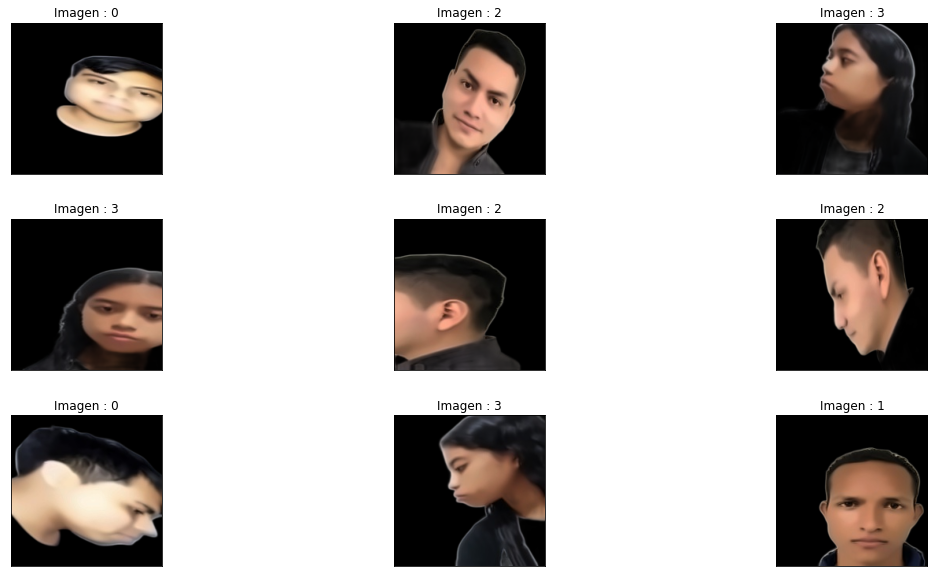

In [5]:
 """
    Este método permite mostrar imagenes de forma aleatoria.

    Parametros
    -----------
        images []: Lista de imagenes cargadas.
        labels []: Lista de etiquétas.
"""
def display_rand_images(images, labels):
    # Definimos la escala de las figuras
    plt.figure(1 , figsize = (19 , 10))
    # Inicializamos un contador
    n = 0 
    # Bucle que recorre 9 veces
    for i in range(9):
        # Incremento del contador
        n += 1 
        # Obtenemos un numero aleatorio
        r = np.random.randint(0 , images.shape[0] , 1)
        # Establecemos la forma de presentar las imagenes
        plt.subplot(3 , 3 , n)
        # Ajustamos la forma de mostrar las imagenes
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        # Mostramos las imagenes
        plt.imshow(images[r[0]])
        # Definimos la etiqueta de las imagenes
        plt.title('Imagen : {}'.format(labels[r[0]]))
        # Establecemos la medida x
        plt.xticks([])
        # Establecemos la medida y
        plt.yticks([])
    #Mostramos la gráfica generada
    plt.show()
    
# LLamamos al metodo para mostrar las imagenes
display_rand_images(images, labels)

## Prepare Data for training the CNN model

In [6]:
#obtener números igualmente espaciados en un rango dado
n = np.arange(images.shape[0])
# Mostramos los valores
print("'n' Valores antes de reorganizarlos = ",n)

# llamamos a la función random_seed
np.random.seed(random_seed)
#mezclar todos los valores igualmente espaciados en la lista 'n'
np.random.shuffle(n)
# Mostramos los valores despues de reorganizarlos 
print("\n'n' Valores después de reorganizarlos = ",n)

'n' Valores antes de reorganizarlos =  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164]

'n' Valores después de reorganizarlos =  [ 13  80 105  68  44  88  17  69  39 148  38  79 146 154  53  54 156 142
  27  28 112 101   6  78 163 162  37  26  67  31 111  51  73 160   3   9
  85   2  25  21 100 132  93  60   8 140  89  20 122  43 158  55  86  23
 106  97  70  35 138  47  83 

In [7]:
# Imágenes aleatorias y datos de etiquetas correspondientes a la lista de imagenes
images = images[n]
# Imágenes aleatorias y datos de etiquetas correspondientes a la lista de etiquetas
labels = labels[n]
# Impromimos los detalles de ambas listas
print("Images shape after shuffling = ",images.shape,"\nLabels shape after shuffling = ",labels.shape)

Images shape after shuffling =  (165, 192, 192, 3) 
Labels shape after shuffling =  (165,)


In [8]:
# Cambiamos el formato de las imagenes
images = images.astype(np.float32)
# Cambiamos el formato de las etiquetas
labels = labels.astype(np.int32)
# Dividimos el valor de las imagenes para 255
images = images/255
# Mostramos el valor de las imagenes después de normalizarlas
print("Forma de las imágenes después de normalizarlas = ",images.shape)

Forma de las imágenes después de normalizarlas =  (165, 192, 192, 3)


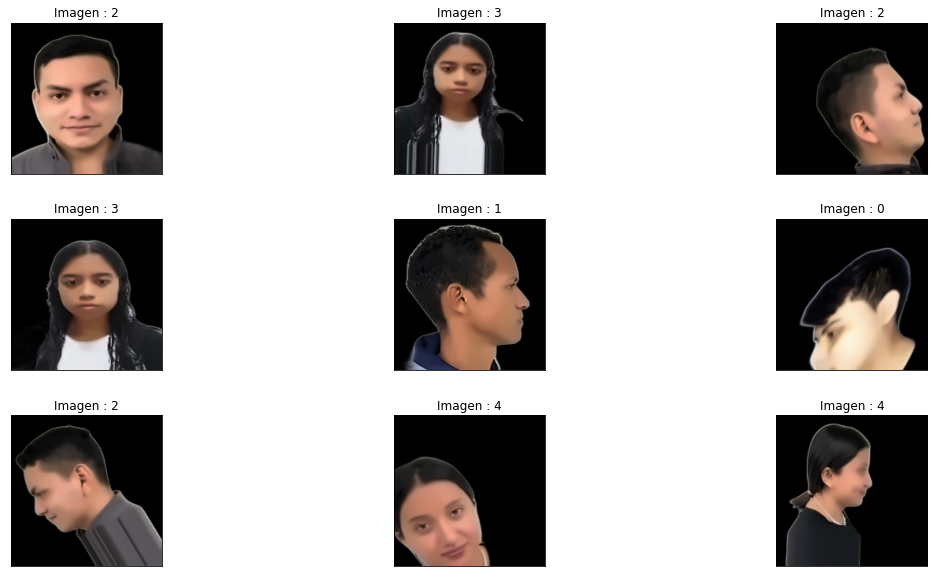

In [9]:
# Mostramos las imagenes de manera aleatoria
display_rand_images(images, labels)

In [10]:
# Definimos los datos de entrenamiento y prueba
train_ds, test_ds, train_labels, test_labels = train_test_split(images, labels, test_size = 0.2, random_state = random_seed)
# Mostramos la forma de las imágenes de entrenamiento
print("train_ds shape = ",train_ds.shape)
# Mostramos la forma de las etiquetas de entrenamiento
print("train_labels shape = ",train_labels.shape)
# Mostramos la forma de las imágenes de prueba
print("\ntest_ds shape = ",test_ds.shape)
# Mostramos la forma de las etiquetas de prueba
print("test_labels shape = ",test_labels.shape)

train_ds shape =  (132, 192, 192, 3)
train_labels shape =  (132,)

test_ds shape =  (33, 192, 192, 3)
test_labels shape =  (33,)


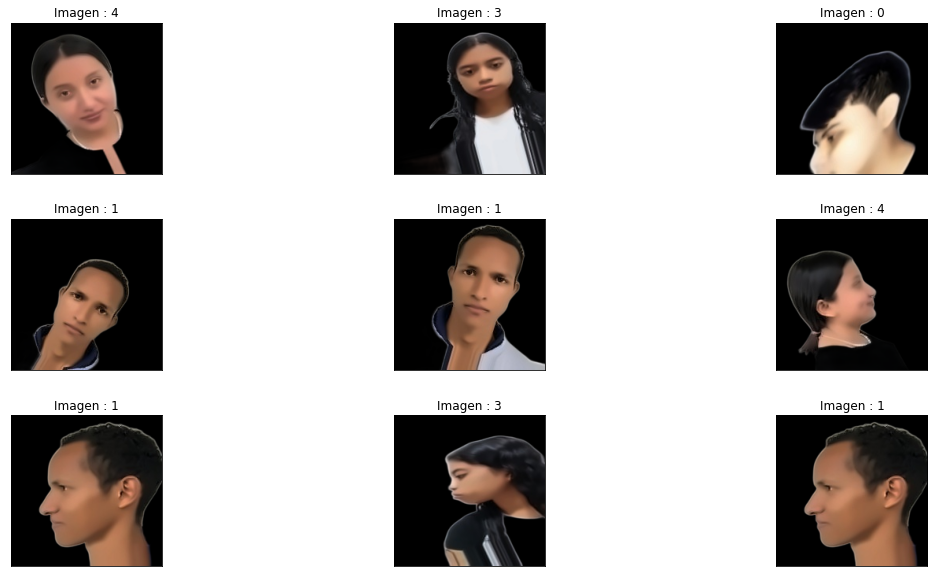

In [11]:
# Mostramos imagenes de entrenamiento de manera aleatoria
display_rand_images(train_ds, train_labels)

In [12]:
## Redimencionamos las imagenes de entrenamiento
train_ds = tf.image.resize(train_ds, (227, 227))
## Redimencionamos las imagenes de prueba
test_ds = tf.image.resize(test_ds, (227, 227))

# Modelo AlexNet CNN
## Definición de las capas AlexNET CNN

In [13]:
# Instanciamos el modelo
model=Sequential()

#Agregamos la primera capa combolucional
model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3)))

#Agregamos la primera capa max pool
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

# Agregamos la normalización al modelo
model.add(BatchNormalization())

#Agregamos la segunda capa combolucional
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))

#Agregamos la segunda capa max pool
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
# Agregamos la normalización al modelo
model.add(BatchNormalization())

#Agregamos la tercera capa combolucional
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#Agregamos la cuarta capa combolucional
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#Agregamos la quinta capa combolucional
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#Agregamos la tercera capa max pool
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
# Agregamos la normalización al modelo
model.add(BatchNormalization())

# Redimencionamos el modelo
model.add(Flatten())

#Añadimos la primera capa de densidad
model.add(Dense(4096,input_shape=(227,227,3),activation="relu"))
# Omitir aleatoriamente neuronas
model.add(Dropout(0.4))
# Normalizamos el modelo
model.add(BatchNormalization())

# Añadimos la segunda capa de densidad
model.add(Dense(4096,activation="relu"))
# Omitir aleatoriamente neuronas
model.add(Dropout(0.4))
# Normalizamos el modelo
model.add(BatchNormalization())

# Añadimos la segunda capa de densidad
model.add(Dense(1000,activation="relu"))
# Omitir aleatoriamente neuronas
model.add(Dropout(0.4))
# Normalizamos el modelo
model.add(BatchNormalization())

# Capa de salida
model.add(Dense(20,activation="softmax"))
# Resumen del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 27, 27, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 256)      0         
 2D)                                                             
                                                        

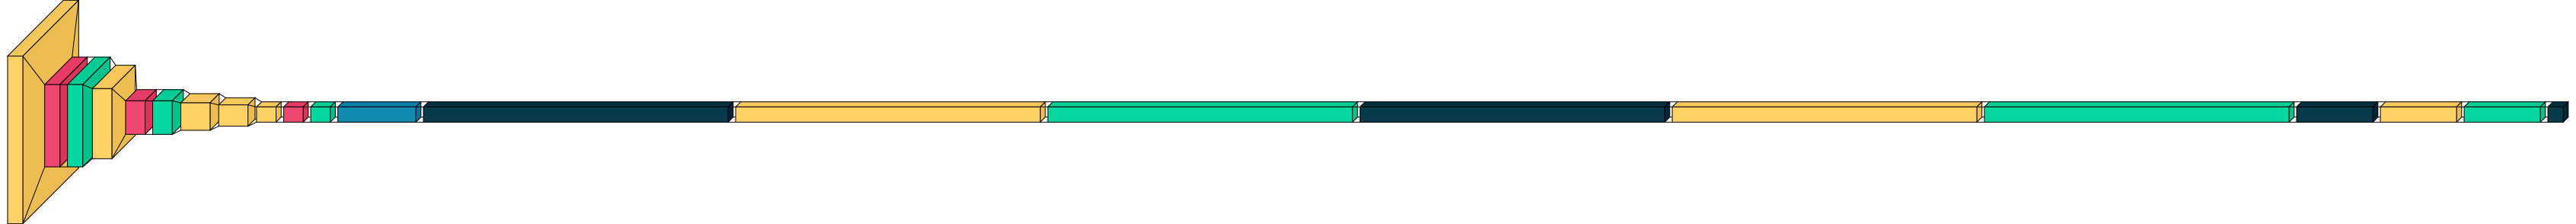

In [14]:
# Grafica del modelo generado
visualkeras.layered_view(model)

## Compilación del modelo CNN

In [15]:
# Compilamos el modelo
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

## Entrenamiento del modelo

In [20]:
#Marca de tiempo
%time
# Entrenamiento del modelo
model.fit(train_ds, train_labels, epochs=100)

Wall time: 0 ns
Epoch 1/100
5/5 [==============================] - 10s 2s/step - loss: 0.3879 - accuracy: 0.8712
Epoch 2/100
5/5 [==============================] - 8s 2s/step - loss: 0.2953 - accuracy: 0.8939
Epoch 3/100
5/5 [==============================] - 9s 2s/step - loss: 0.2554 - accuracy: 0.9015
Epoch 4/100
5/5 [==============================] - 9s 2s/step - loss: 0.4368 - accuracy: 0.8561
Epoch 5/100
5/5 [==============================] - 9s 2s/step - loss: 0.4260 - accuracy: 0.8258
Epoch 6/100
5/5 [==============================] - 9s 2s/step - loss: 0.4199 - accuracy: 0.8561
Epoch 7/100
5/5 [==============================] - 9s 2s/step - loss: 0.4518 - accuracy: 0.8485
Epoch 8/100
5/5 [==============================] - 10s 2s/step - loss: 0.3169 - accuracy: 0.9015
Epoch 9/100
5/5 [==============================] - 10s 2s/step - loss: 0.5451 - accuracy: 0.8258
Epoch 10/100
5/5 [==============================] - 10s 2s/step - loss: 0.2892 - accuracy: 0.8864
Epoch 11/100
5/5 [=

5/5 [==============================] - 10s 2s/step - loss: 0.5344 - accuracy: 0.8030
Epoch 85/100
5/5 [==============================] - 10s 2s/step - loss: 0.5425 - accuracy: 0.8333
Epoch 86/100
5/5 [==============================] - 10s 2s/step - loss: 0.3862 - accuracy: 0.8864
Epoch 87/100
5/5 [==============================] - 10s 2s/step - loss: 0.2864 - accuracy: 0.8864
Epoch 88/100
5/5 [==============================] - 10s 2s/step - loss: 0.4163 - accuracy: 0.8561
Epoch 89/100
5/5 [==============================] - 10s 2s/step - loss: 0.4620 - accuracy: 0.8333
Epoch 90/100
5/5 [==============================] - 10s 2s/step - loss: 0.2694 - accuracy: 0.9091
Epoch 91/100
5/5 [==============================] - 10s 2s/step - loss: 0.3276 - accuracy: 0.9015
Epoch 92/100
5/5 [==============================] - 10s 2s/step - loss: 0.3583 - accuracy: 0.8561
Epoch 93/100
5/5 [==============================] - 10s 2s/step - loss: 0.5319 - accuracy: 0.8030
Epoch 94/100
5/5 [===============

## Evaluación del modelo

In [21]:
# Evaluamos el modelo
loss, accuracy = model.evaluate(test_ds, test_labels)
# Mostramos los paquetes perdidos y el accuracy
print(loss,accuracy)

2/2 [==============================] - 1s 49ms/step - loss: 0.7159 - accuracy: 0.7879
0.7159086465835571 0.7878788113594055


## Predicción mediante el modelo entrenado

In [22]:
# Enviamos los datos de predicción
pred = model.predict(test_ds)
# Tamaño de las predicciones
pred.shape

(33, 20)

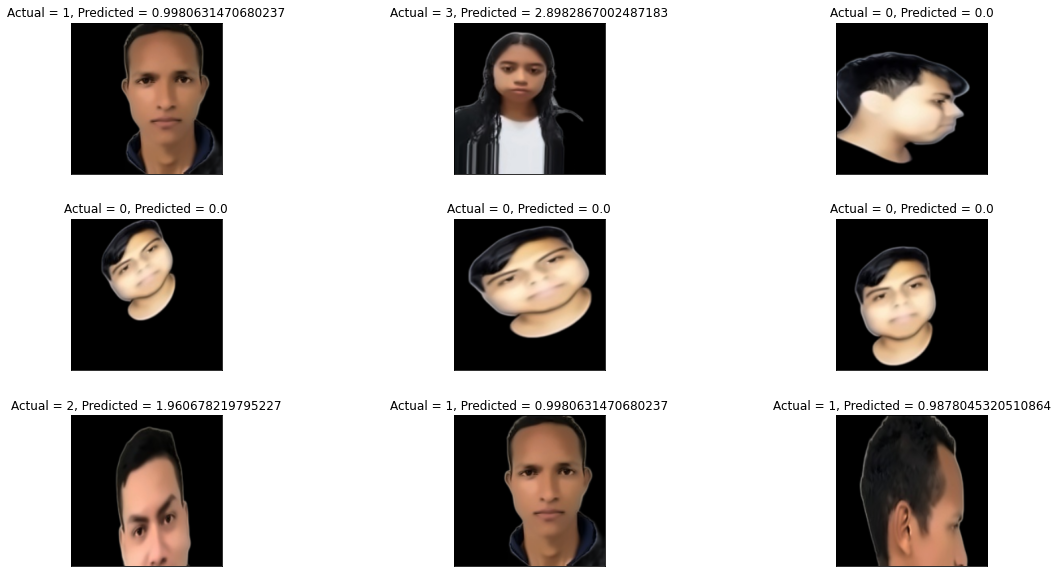

In [23]:
# Definir el tamaño de las figuras
plt.figure(1 , figsize = (19 , 10))
# Definimos un contador
n = 0 
# Bucle para mostrar las imagenes
for i in range(9):
    # Incrementamos el contador
    n += 1 
    # Obtenemos una imagen aleatoria
    r = np.random.randint( 0, test_ds.shape[0], 1)
    # Establecemos la forma de presentar las imagenes
    plt.subplot(3 , 3 , n)
    # Ajustamos la forma de mostrar las imagenes
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    # obtenemos la imagen actual para mostrar
    plt.imshow(test_ds[r[0]])
    # Asignamos las etiquetas
    plt.title('Actual = {}, Predicted = {}'.format(test_labels[r[0]] , test_labels[r[0]]*pred[r[0]][test_labels[r[0]]]) )
    # Establecemos la medida x, y
    plt.xticks([]) , plt.yticks([])

# Mostramos la gráfica
plt.show()